Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
!pip install category_encoders==2.*
!pip install graphviz
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alf-faren/DS-Unit-2-Applied-Modeling/master/breast-cancer.data')

In [4]:
df.head(25)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [5]:
df.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

#### Choose your target. Which column in your tabular dataset will you predict?

In [6]:
df['deg-malig'].describe()

count    286.000000
mean       2.048951
std        0.738217
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: deg-malig, dtype: float64

In [7]:
df['deg-malig'].isnull().sum()

0

#### Is your problem regression or classification?¶


In [8]:
# This is going to be a classification problem

#### How is your target distributed?
- Classification: How many classes? Are the classes imbalanced?
- Regression: Is the target right-skewed? If so, you may want to log transform the target.

In [9]:
y = df['deg-malig']

y.nunique()

3

In [10]:
y.value_counts(normalize=True).max()

0.45454545454545453

#### Choose your evaluation metric(s).
- Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
- Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

In [11]:
y.value_counts(normalize=True)

2    0.454545
3    0.297203
1    0.248252
Name: deg-malig, dtype: float64

#### Choose which observations you will use to train, validate, and test your model.
- Are some observations outliers? Will you exclude them?
- Will you do a random split or a time-based split?

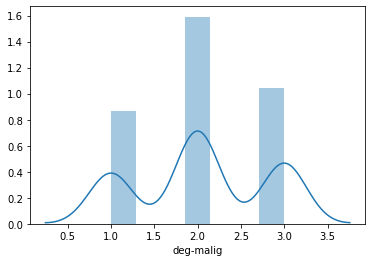

In [12]:
import seaborn as sns
sns.distplot(y);

In [13]:
y.describe()

count    286.000000
mean       2.048951
std        0.738217
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: deg-malig, dtype: float64

In [14]:
df = df[(df['deg-malig'] >= np.percentile(df['deg-malig'], 0.5)) & (df['deg-malig'] <= np.percentile(df['deg-malig'], 99.5))]

y = df['deg-malig']

In [15]:
y.describe()

count    286.000000
mean       2.048951
std        0.738217
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: deg-malig, dtype: float64

#### Begin to clean and explore your data.

In [16]:
df['deg-malig'].nunique()

3

In [17]:
df['deg-malig'].unique()

array([3, 2, 1], dtype=int64)

In [18]:
df.isnull().sum().sort_values()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
 
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df['deg-malig'], random_state=42)

train.shape, test.shape

((228, 10), (58, 10))

#### Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [20]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'deg-malig'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_test, y_test))

Validation Accuracy 0.41379310344827586


In [22]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

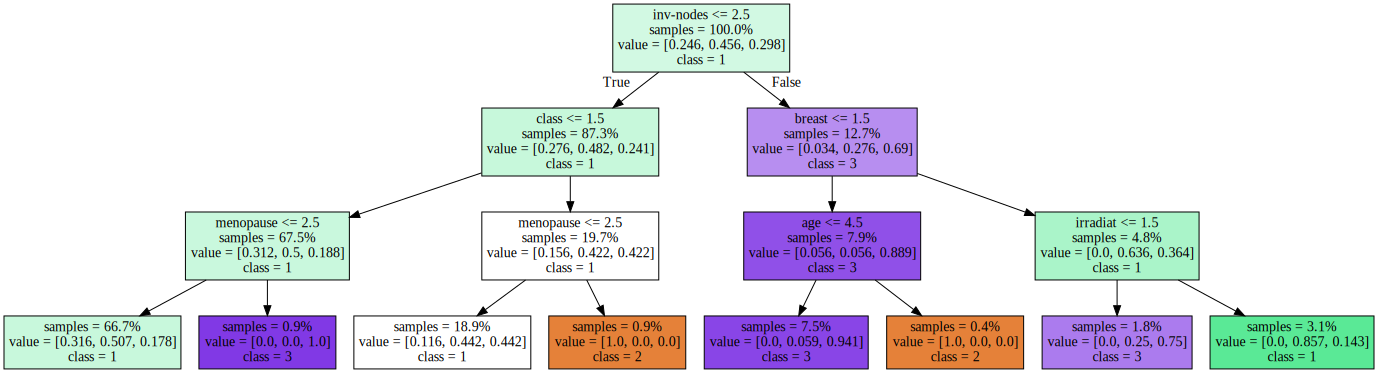

In [23]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)